### Import module

In [14]:
import os
import  pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Union

In [15]:
ROOT = os.path.dirname(os.getcwd())
DATAPATH = f"{ROOT}/data/train.csv"
data = pd.read_csv(DATAPATH)

### Function

In [16]:
def boxplot(data: pd.DataFrame) -> None:
    '''
    Draw box plots.
    '''
    # Convert data into a long format.
    data_melted = pd.melt(data, var_name='Variable', value_name='Value')

    # Draw box plots.
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x='Variable', y='Value', data=data_melted)
    plt.title('Box Plot of Multiple Variables')
    plt.xlabel('Variables')
    plt.ylabel('Values')

    # Rotate the x-axis labels by 90 degrees.
    for label in ax.get_xticklabels():
        label.set_rotation(90)

    plt.show()


def hist(data: pd.DataFrame) -> None:
    '''
    Draw histograms.
    '''
    column_names = data.columns
    num_columns = len(column_names)

    # Calculate the required number of rows and columns.
    num_rows = num_columns // 4
    if num_columns % 4 != 0:
        num_rows += 1

    # Create a subplot grid with the calculated number of rows and 4 columns.
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
    axes = axes.ravel()

    # Draw histograms and delete delete the extra subplots.
    for i, column in enumerate(column_names):
        ax = axes[i]
        if i < num_columns:
            data[column].hist(ax=ax)
            ax.set_xlabel(f'{column}')
            ax.set_ylabel('Count')
            ax.set_title(f'{column} Distribution')
            ax.grid(False)

    for i in range(num_columns, num_rows * 4):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()


def missing_value(data: pd.DataFrame) -> pd.DataFrame:
    '''
    View the missing values and the proportion in features within a dataframe.
    '''
    df_missing_value = pd.DataFrame(data.isna().sum(), columns=['missing value'])
    df_missing_value = df_missing_value.sort_values(by='missing value', ascending=False)
    df_missing_value['missing value %'] = round(df_missing_value['missing value']/len(data), 2)
    return df_missing_value


def turn_positive(x: Union[int, float]) -> Union[int, float]:
    '''
    Turn numbers into positive.
    '''
    return abs(x)


def ckeck_mode_median(data: pd.DataFrame) -> pd.DataFrame:
    '''
    View mode and median in features within a dataframe.
    '''
    data_median = data.describe()
    data_median = data_median.transpose()
    data_median = pd.DataFrame(data_median['50%'])

    modes = data.mode()
    modes = modes.head(1)
    modes = pd.DataFrame(modes.transpose())
    modes.columns = ['mode']

    merged_df = pd.merge(data_median, modes, left_index=True, right_index=True)
    merged_df = round(merged_df.sort_values(by='50%', ascending=True), 2)
    return merged_df


def check_collinearity(data:pd.DataFrame) -> None:
    correlation_matrix = data.iloc[:, :-2].corr()
    plt.figure(figsize=(10, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.show()


def data_preproc(data: pd.DataFrame) -> pd.DataFrame:
    '''
    Preprocess data and save outcome.
    '''
    df_missing_value = missing_value(data)

    # Keep features with less than 80% missing values.
    remain_columns = list(df_missing_value[df_missing_value['missing value %'] < 0.8].index)
    data_preproc = data[remain_columns]

    # Turn numbers into positive.
    data_preproc = turn_positive(data_preproc)

    # Drop outliers by setting benchmarks and filtering out extremely large or small numbers.
    for column in (data_preproc.columns)[:-1]:   
        banchmark = data_preproc[column].quantile(0.7)
        
        if(banchmark < 500):
            if banchmark != 0:
                data_preproc[column] = data_preproc[column].apply(lambda x: None if (x > 3 *banchmark) else x)
            else:
                data_preproc[column] = data_preproc[column].apply(lambda x: None if (x > 500) else x)

        else:
            data_preproc[column] = data_preproc[column].apply(lambda x: None if ((x > 5 * banchmark)|(x < 1/5 * banchmark)) else x)
            
    round(data_preproc.describe(), 2).T
    file_path = f"{ROOT}/data/train_preproc.csv"
    data_preproc.to_csv(file_path, index=False)
    return data_preproc


### EDA

In [17]:
# 查看資料量
data.shape

(3334, 59)

In [18]:
# 查看資料型態
data_types = data.dtypes
data_types.value_counts()

float64    58
int64       1
Name: count, dtype: int64

In [19]:
# 看資料分布
round(data.describe(), 2)

D_Dbuild  D_StructureSystem_RC  D_StructureSystem_Precast_Concrete  \
count  3.034000e+03               3034.00                              3034.0   
mean   8.378646e+05               3386.47                                 0.0   
std    2.407838e+07             143140.01                                 0.0   
min   -2.797630e+08           -1143922.97                                 0.0   
25%    1.931000e+03                  0.00                                 0.0   
50%    1.984000e+03                  1.00                                 0.0   
75%    2.012000e+03                  1.00                                 0.0   
max    2.948692e+08            1353461.29                                 0.0   

       D_StructureSystem_Steel  D_StructureSystem_Reinfored_Brick  \
count                  3034.00                            3034.00   
mean                   -350.24                               0.16   
std                   13187.77                               0.36   
min                 -143080.51                               0.00   
25%                       0.00                               0.00   
50%                       0.00                               0.00   
75%                       0.00                               0.00   
max                  104586.42                               1.00   

       D_StructureSystem_Brick_Wall  \
count                       3034.00   
mean                        -182.52   
std                        20211.61   
min                      -184521.52   
25%                            0.00   
50%                            0.00   
75%                            0.00   
max                       193310.45   

       D_StructureSystem_Brick_wall_with_Wooden_pillar  \
count                                           3034.0   
mean                                               0.0   
std                                                0.0   
min                                                0.0   
25%                                                0.0   
50%                                                0.0   
75%                                                0.0   
max                                                0.0   

       D_StructureSystem_Wood_or_Synthetic_Resins  D_StructureSystem_SRC  \
count                                     3034.00                3034.00   
mean                                         0.00                -594.02   
std                                          0.02               12601.32   
min                                          0.00              -99768.31   
25%                                          0.00                   0.00   
50%                                          0.00                   0.00   
75%                                          0.00                   0.00   
max                                          1.00              130089.05   

       D_StructureSystem_NaN  ...  D_Ra_Capacity   D_Ra_CDR  Total_Height  \
count                3034.00  ...          28.00     325.00       3034.00   
mean                 1703.38  ...           0.23   -4391.49         60.96   
std                109533.86  ...           0.08  181851.97        250.78   
min               -991140.79  ...           0.11 -524599.13          0.00   
25%                     0.00  ...           0.16 -131218.91          7.20   
50%                     0.00  ...           0.22       0.58         10.80   
75%                     0.00  ...           0.29  121474.39         14.60   
max               1192229.66  ...           0.39  427697.09       2270.00   

       Total_DeadLoad  Total_LiveLoad  Total_Floor  Avg_Confc      Avg_MBfy  \
count    3.034000e+03    3.034000e+03      3034.00    3034.00  3.034000e+03   
mean     3.015481e+10    3.519362e+06      2026.96     179.33 -4.049335e+06   
std      1.381267e+12    1.292785e+08      1993.96     161.56  1.713201e+08   
min     -1.274041e+13    0.000000e+00         0.00    -193.84 -1.616031e+09   
25%     -1

In [20]:
# 查看缺失值
df_missing_value = missing_value(data)
df_missing_value

missing value  \
D_sms                                                     3310   
D_Ra_Capacity                                             3306   
D_tm0                                                     3011   
D_Ra_CDR                                                  3009   
D_sm1                                                     3000   
D_floorTAGround                                           1231   
D_Demand                                                   637   
D_MaxCl                                                    625   
D_NeutralDepth                                             621   
D_sd1                                                      568   
D_td0                                                      555   
D_sds                                                      532   
D_patitionwall                                             304   
D_nonstructure                                             303   
D_Ty                                                       302   
D_windows                                                  302   
D_Tx                                                       301   
D_I                                                        301   
D_475Acc                                                   301   
D_basintype                                                301   
D_CLlarge                                                  300   
D_CLsmall                                                  300   
Total_Height                                               300   
Total_DeadLoad                                             300   
Total_LiveLoad                                             300   
Total_Floor                                                300   
Avg_Confc                                                  300   
Avg_MBfy                                                   300   
Avg_stify                                                  300   
D_Dbuild                                                   300   
D_Y3brickwall                                              300   
D_StructureSystem_RC                                       300   
D_Y4brickwall                                              300   
D_StructureSystem_Precast_Concrete                         300   
D_StructureSystem_Steel                                    300   
D_StructureSystem_Reinfored_Brick                          300   
D_StructureSystem_Brick_Wall                               300   
D_StructureSystem_Brick_wall_with_Wooden_pillar            300   
D_StructureSystem_Wood_or_Synthetic_Resins                 300   
D_StructureSystem_SRC                                      300   
D_StructureSystem_NaN                                      300   
D_structure_6                                              300   
D_structure_5                                              300   
D_structure_4                                              300   
D_structure_3                                              300   
D_structure_2                                              300   
D_structure_1                                              300   
D_floor                                                    300   
D_floorTA                                                  300   
D_1floorCorridorCol                                        300   
D_1floorCorridorColA                                       300   
D_1floorClassCol                                           300   
D_1floorClassColA                                          300   
D_1floorInsideCol                                          300   
D_1floorInsideColA                                         300   
D_X4brickwall                                              300   
D_X3brickwall                                              300   
D_YRCwallA                                                 300   
D_isR                                                        0   

                                                 missing value %  
D_sms                

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


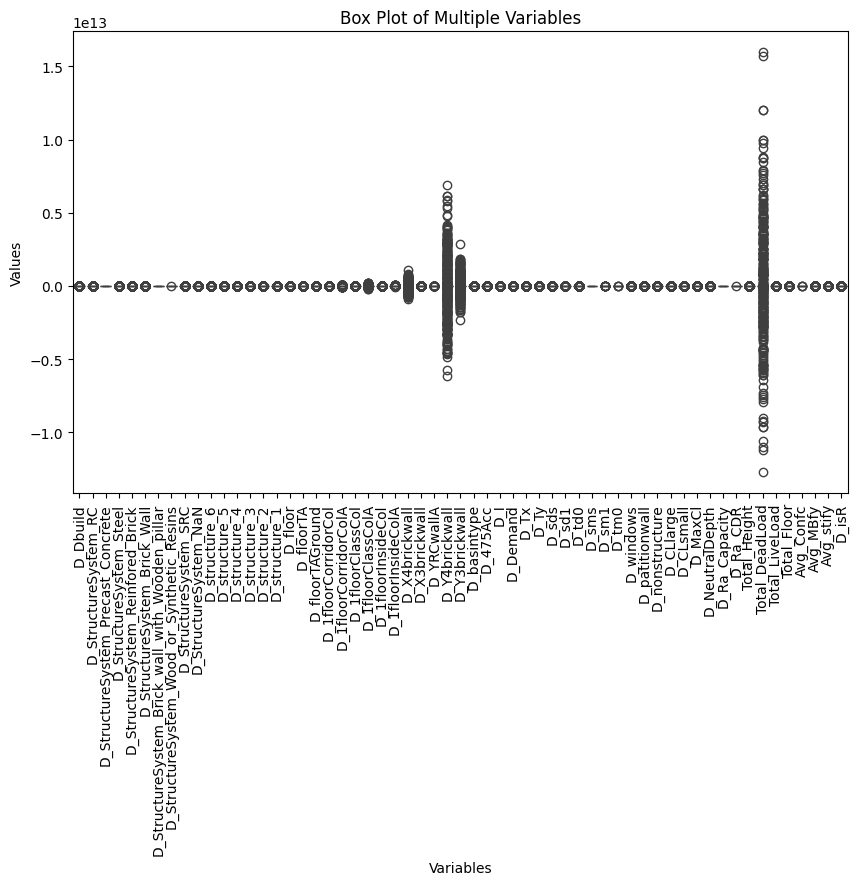

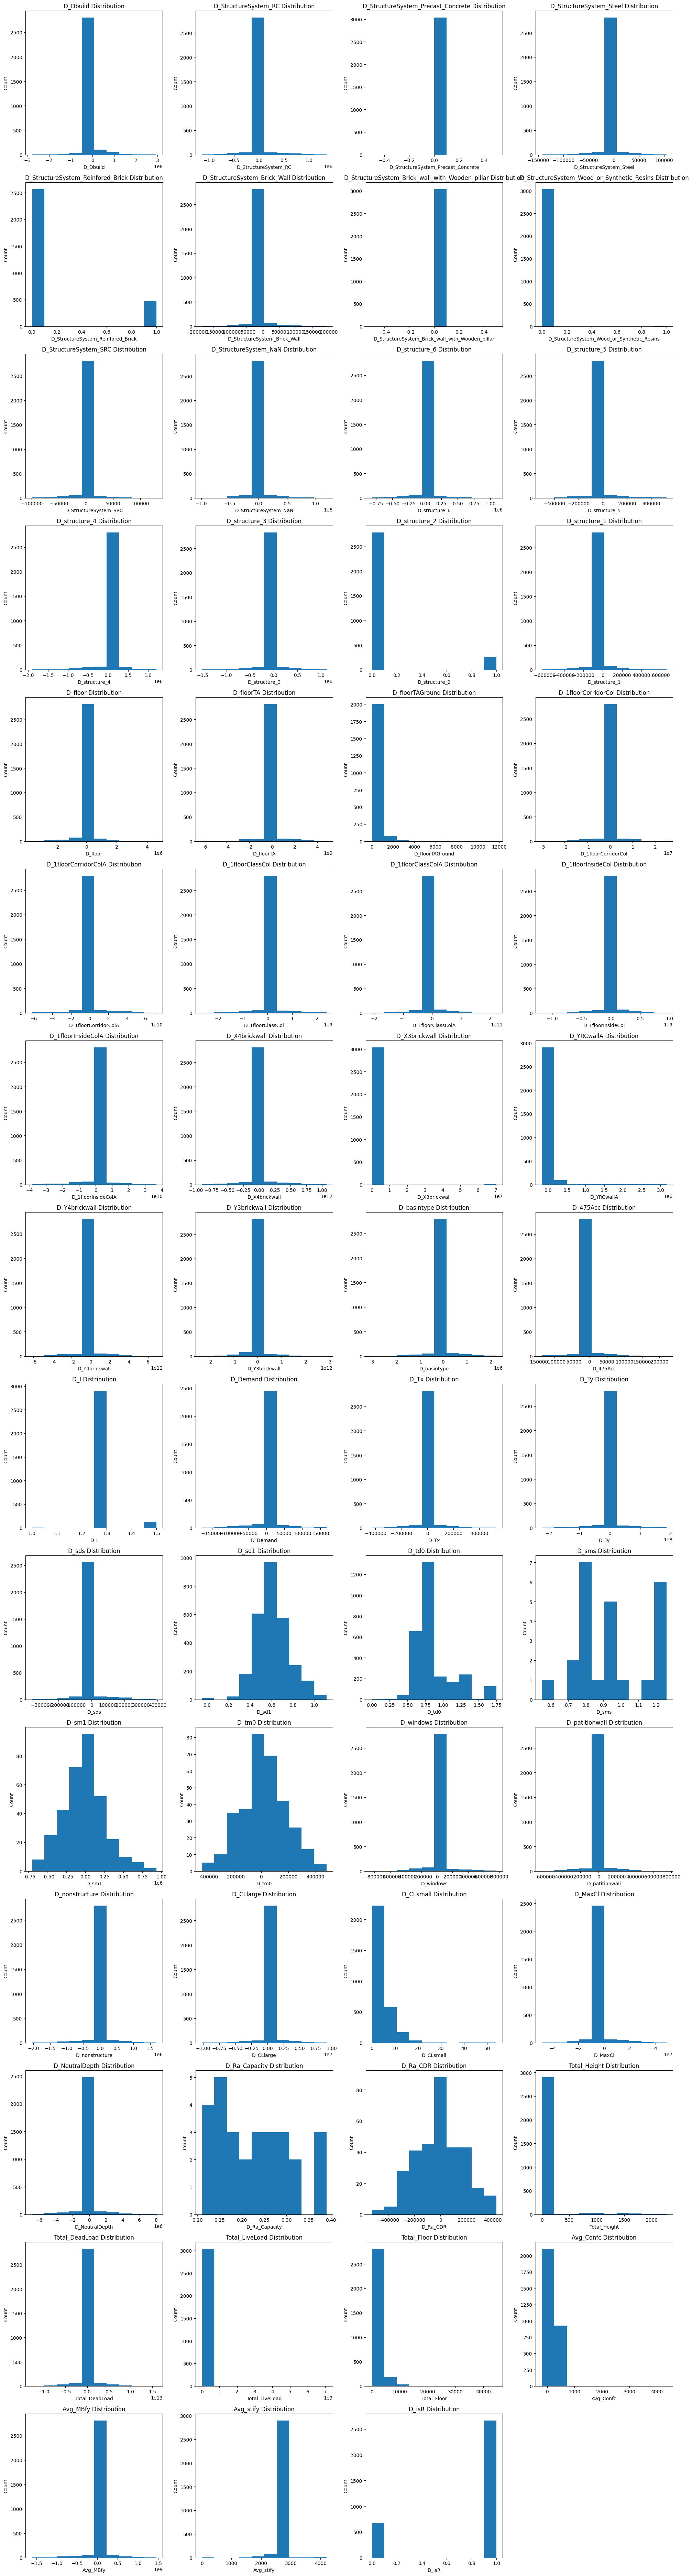

In [21]:
boxplot(data)
hist(data)

In [22]:
ckeck_mode_median(data)

50%        mode
D_sm1                                              -1755.55        0.55
D_Y3brickwall                                          0.00        0.00
D_X3brickwall                                          0.00        0.00
D_X4brickwall                                          0.00        0.00
D_1floorInsideColA                                     0.00        0.00
D_1floorInsideCol                                      0.00        0.00
D_CLlarge                                              0.00        0.00
D_1floorCorridorColA                                   0.00        0.00
D_1floorCorridorCol                                    0.00        0.00
D_structure_1                                          0.00        0.00
D_structure_2                                          0.00        0.00
D_structure_3                                          0.00        0.00
D_floorTAGround                                        0.00        0.00
D_structure_5                                          0.00        0.00
D_StructureSystem_Precast_Concrete                     0.00        0.00
D_structure_4                                          0.00        0.00
D_StructureSystem_Reinfored_Brick                      0.00        0.00
D_StructureSystem_Brick_Wall                           0.00        0.00
D_StructureSystem_Brick_wall_with_Wooden_pillar        0.00        0.00
D_StructureSystem_Wood_or_Synthetic_Resins             0.00        0.00
D_StructureSystem_Steel                                0.00        0.00
D_StructureSystem_NaN                                  0.00        0.00
D_structure_6                                          0.00        0.00
D_StructureSystem_SRC                                  0.00        0.00
D_MaxCl                                                0.08        0.03
D_Ra_Capacity                                          0.22        0.15
D_Demand                                               0.29        0.24
D_475Acc                                               0.29        0.24
D_Tx                                                   0.37        0.31
D_Ra_CDR                                               0.58        0.47
D_sd1                                                  0.60        0.44
D_sds                                                  0.72        0.60
D_Ty                                                   0.81     -100.44
D_td0                                                  0.82        0.83
D_sms                                                  0.94        0.80
D_windows                                              1.00        1.00
D_patitionwall                                         1.00        1.00
D_nonstructure                                         1.00        0.00
D_isR                                                  1.00        1.00
D_StructureSystem_RC                                   1.00        1.00
D_I                                                    1.25        1.25
D_floor                                                2.00        2.00
D_basintype                                            3.00        2.00
D_NeutralDepth                                         3.90        4.50
D_CLsmall                                              4.00        3.00
Total_Height                                          10.80        7.20
D_1floorClassCol                                      26.00       22.00
Avg_Confc                                            177.83      107.68
Total_Floor                                         1541.00      360.00
D_floorTA                                           1667.35     1363.58
D_Dbuild                                            1984.00     2021.00
Avg_stify                                           2800.00     2800.00
Avg_MBfy                                            2828.62     2590.29
D_tm0                                              11598.73        0.58
D_YRCwallA                                         15374.90   -19134.65
D_1floorClassColA       

In [23]:
data_clear = data_preproc(data)

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


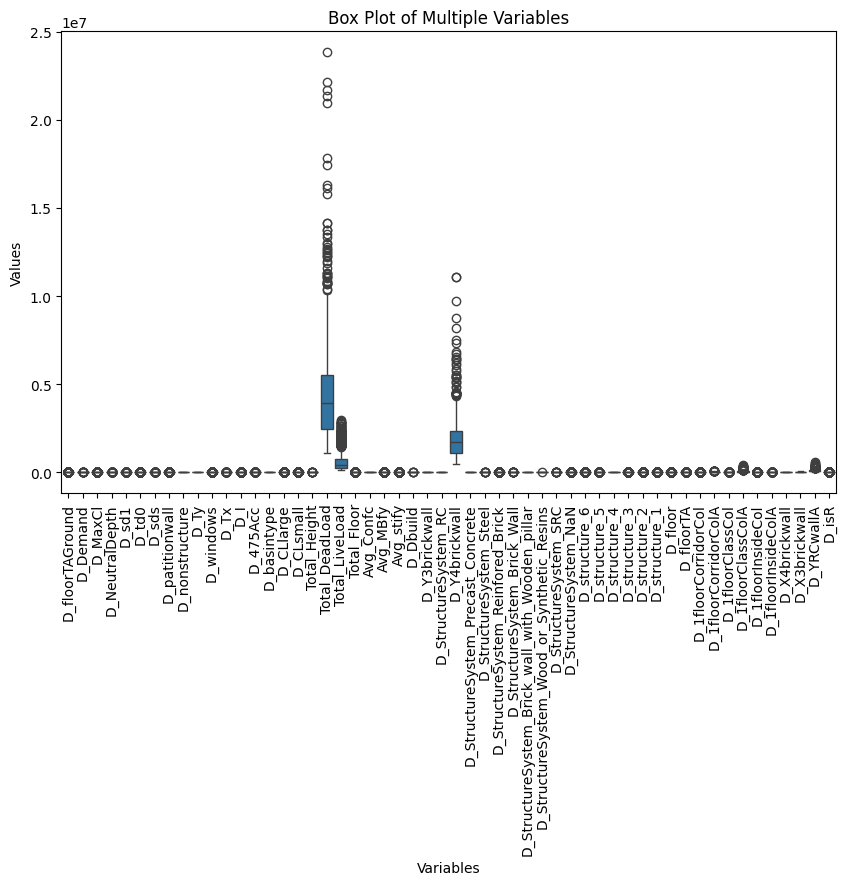

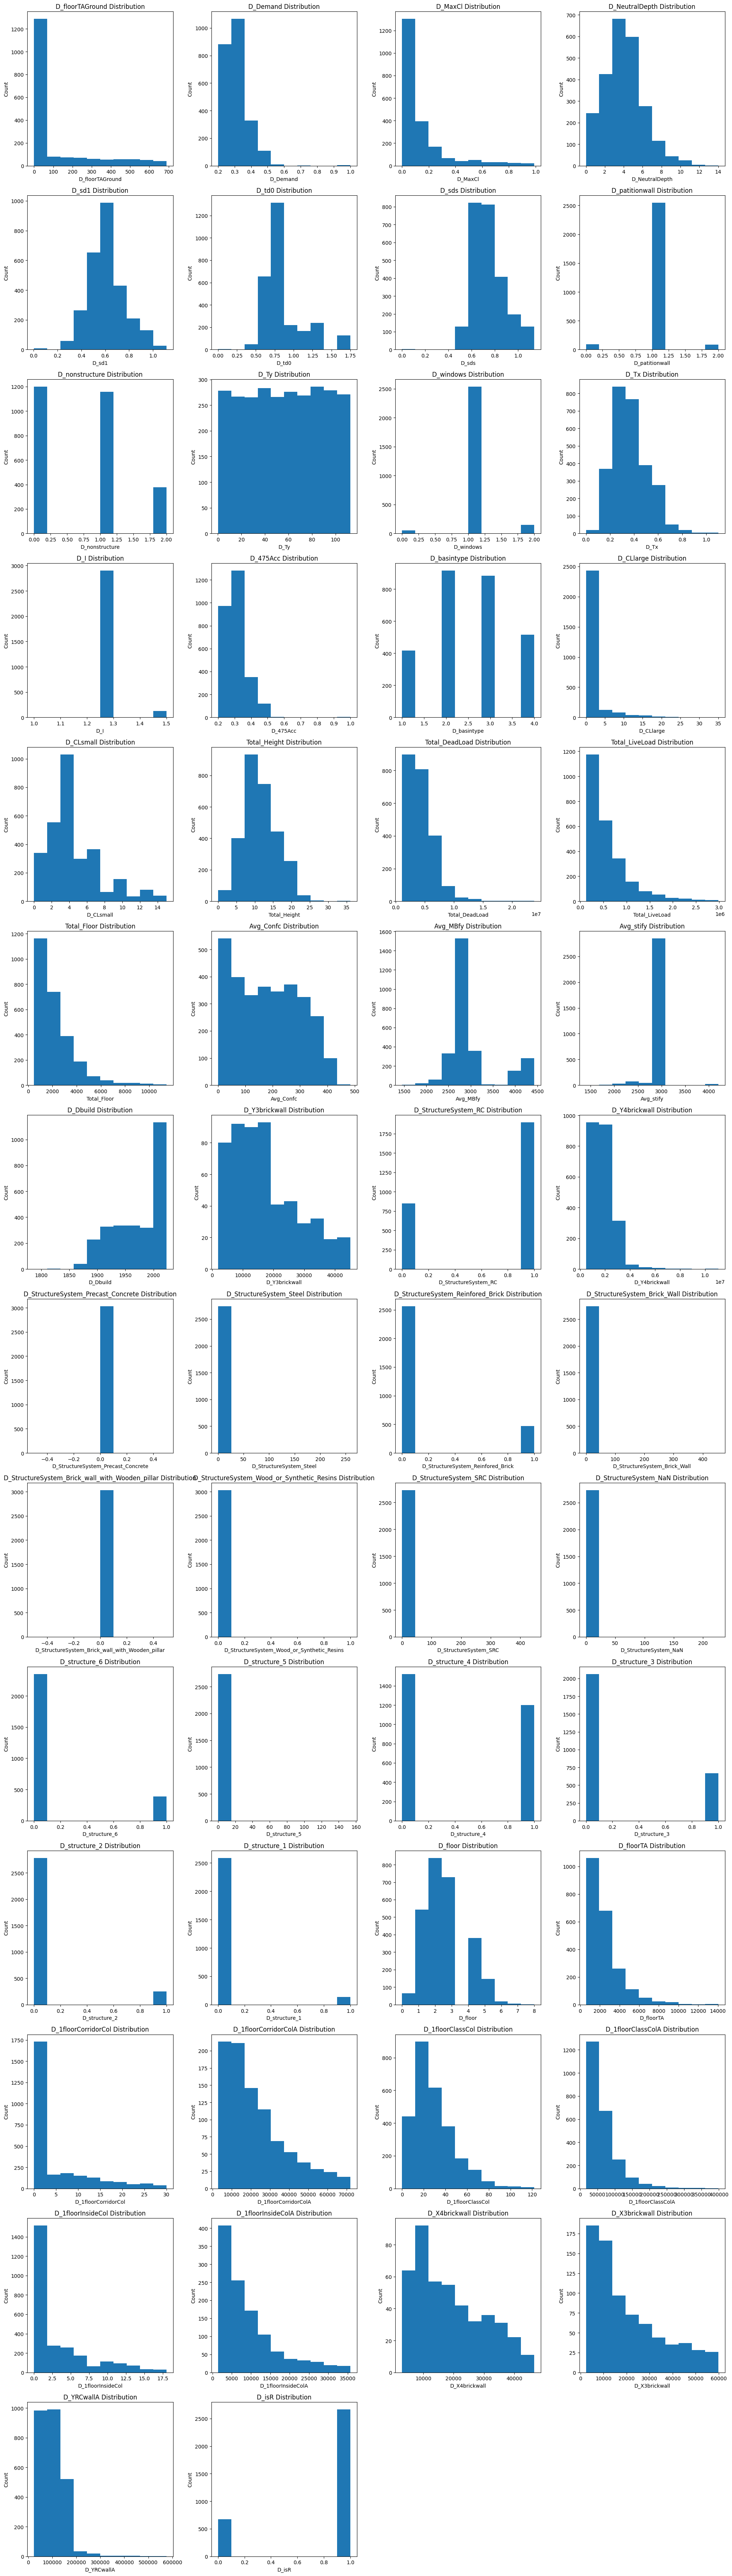

In [24]:
boxplot(data_clear)
hist(data_clear)

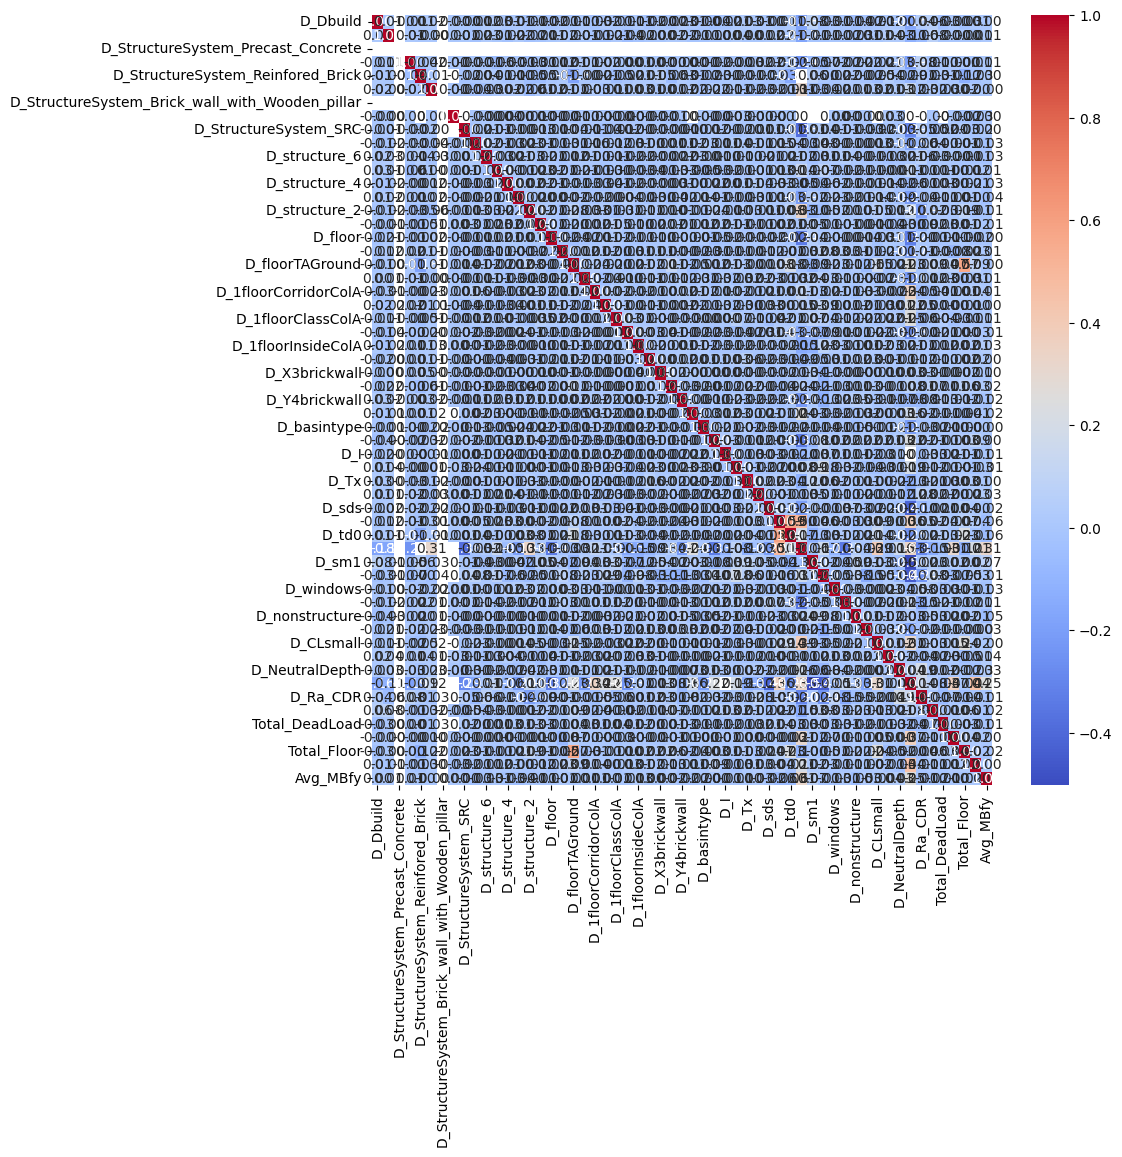

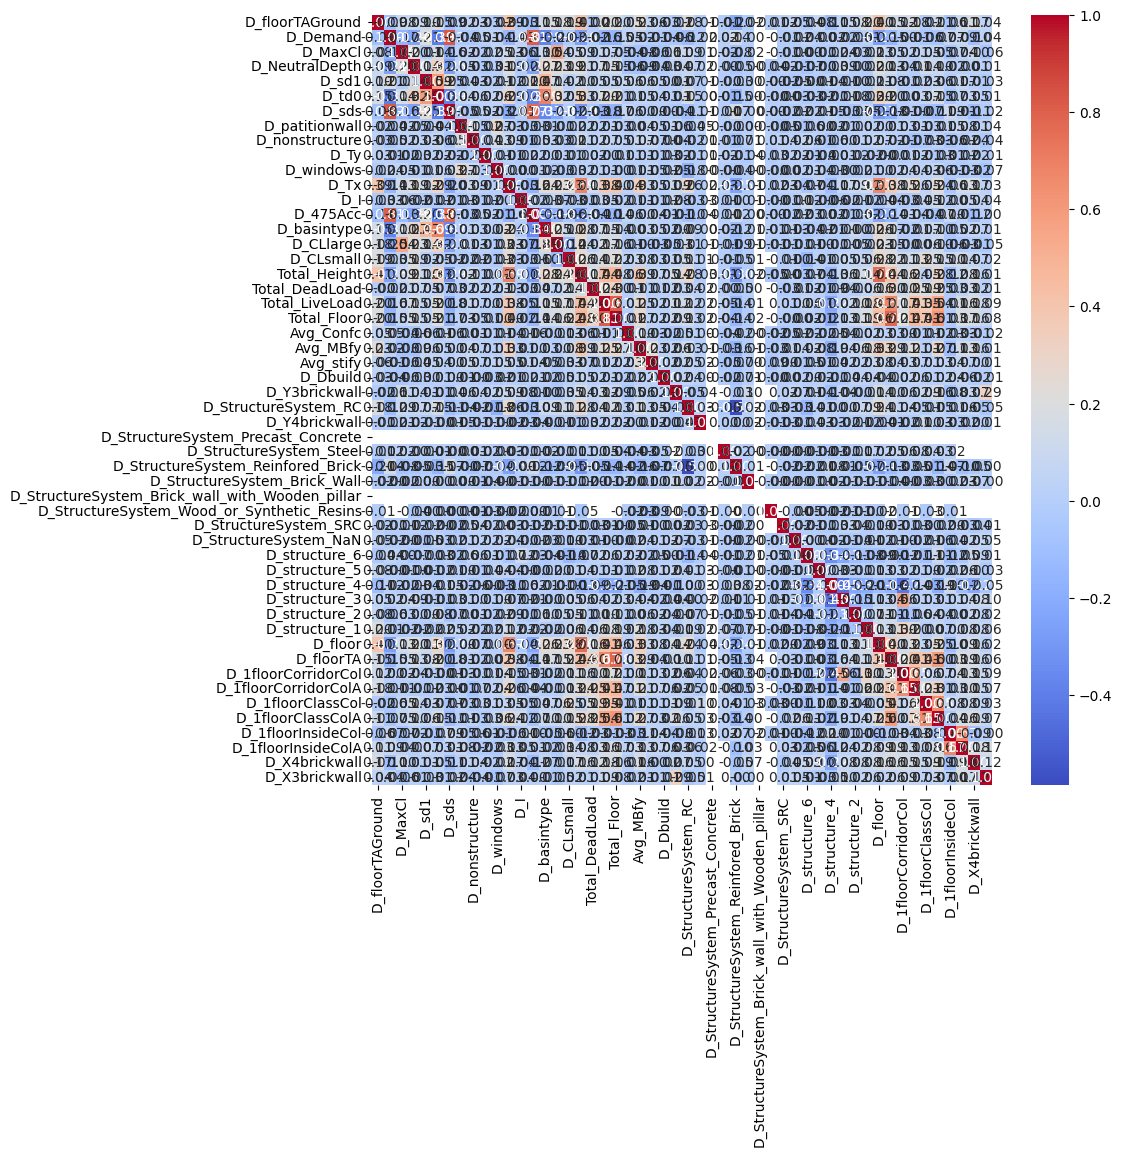

In [25]:
check_collinearity(data)
check_collinearity(data_clear)